In [22]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
from matplotlib import pyplot as plt
from matplotlib import cm
import os
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [23]:
#Set step, paths, pfts and run all
#STEP = 1
#STEP = 'NPP_VegC_VegN_PFT'
CMT='black-spruce'
STEP = 4

#STEP1_results = '/data/workflows/BONA-Birch-STEP1-SA/results.csv'
#STEP1_sample_matrix = '/data/workflows/BONA-Birch-STEP1-SA/sample_matrix.csv'

STEP1_results = '/data/workflows/BONA-BS-STEP1-SA/results.csv'
STEP1_sample_matrix = '/data/workflows/BONA-BS-STEP1-SA/sample_matrix.csv'

NPP_VegC_PFT_results = '/data/workflows/BONA-Birch-NPP-VegC-PFT-SA/results.csv'
NPP_VegC_PFT_sample_matrix = '/data/workflows/BONA-Birch-NPP-VegC-PFT-SA/sample_matrix.csv'

NPP_VegC_PFT_results = '/data/workflows/BONA-BS-NPP-VegC-PFT-SA/results.csv'
NPP_VegC_PFT_sample_matrix = '/data/workflows/BONA-BS-NPP-VegC-PFT-SA/sample_matrix.csv'


#STEP4_results = '/data/workflows/BONA-Birch-STEP4-SA/results.csv'
#STEP4_sample_matrix = '/data/workflows/BONA-Birch-STEP4-SA/sample_matrix.csv'

STEP4_results = '/data/workflows/BONA-BS-STEP4-SA/results.csv'
STEP4_sample_matrix = '/data/workflows/BONA-BS-STEP4-SA/sample_matrix.csv'

pfts=['White Spruce', 'Deciduous Shrub', 'Evergreen Shrub', 'Moss', 'Lichen']

In [24]:
#if number of pfts != 5 you will have to adjust these values

if STEP == 1:
    target_vars = ['GPP1', 'GPP2', 'GPP3', 'GPP4', 'GPP5']
    
    calib_params = [['cmax', 'cmax.1', 'cmax.2', 'cmax.3', 'cmax.4']] # here for reference
    
    vars_nopft= ['GPP']
    
if STEP == 'NPP_VegC_PFT' and CMT=='birch':
    target_vars = ['NPPAll1', 'NPPAll2', 'NPPAll3', 'NPPAll4', 'NPPAll5',
                   'VegCarbonLeaf1', 'VegCarbonStem1', 'VegCarbonRoot1', 
                   'VegCarbonLeaf2', 'VegCarbonStem2', 'VegCarbonRoot2',
                   'VegCarbonLeaf3', 'VegCarbonStem3', 'VegCarbonRoot3',
                   'VegCarbonLeaf4', 
                   'VegCarbonLeaf5', 'VegCarbonStem5', 'VegCarbonRoot5']
    
    calib_params = [['nmax'], ['krb(0)'], ['krb(1)'], ['krb(2)'],
                   ['cfall(0)'], ['cfall(1)'], ['cfall(2)'],
                   ['nfall(0)'], ['nfall(1)'], ['nfall(2)']] # here for reference
    calib_params_flat = ['nmax', 'krb(0)', 'krb(1)', 'krb(2)',
                   'cfall(0)', 'cfall(1)', 'cfall(2)',
                    'nfall(0)', 'nfall(1)', 'nfall(2)']
    vars_nopft= ['NPPAll', 'VegCarbonLeaf', 'VegCarbonStem', 'VegCarbonRoot']
    
if STEP == 'NPP_VegC_VegN_PFT' and CMT=='birch':
    target_vars = ['NPPAll1', 'NPPAll2', 'NPPAll3', 'NPPAll4', 'NPPAll5',
                   'VegCarbonLeaf1', 'VegCarbonStem1', 'VegCarbonRoot1', 
                   'VegCarbonLeaf2', 'VegCarbonStem2', 'VegCarbonRoot2',
                   'VegCarbonLeaf3', 'VegCarbonStem3', 'VegCarbonRoot3',
                   'VegCarbonLeaf4', 
                   'VegCarbonLeaf5', 'VegCarbonStem5', 'VegCarbonRoot5',
                   'VegNitrogenLeaf1', 'VegNitrogenStem1', 'VegNitrogenRoot1', 
                   'VegNitrogenLeaf2', 'VegNitrogenStem2', 'VegNitrogenRoot2',
                   'VegNitrogenLeaf3', 'VegNitrogenStem3', 'VegNitrogenRoot3',
                   'VegNitrogenLeaf4', 
                   'VegNitrogenLeaf5', 'VegNitrogenStem5', 'VegNitrogenRoot5']
    
    calib_params = [['nmax'], ['krb(0)'], ['krb(1)'], ['krb(2)'],
                   ['cfall(0)'], ['cfall(1)'], ['cfall(2)'],
                   ['nfall(0)'], ['nfall(1)'], ['nfall(2)']] # here for reference
    calib_params_flat = ['nmax', 'krb(0)', 'krb(1)', 'krb(2)',
                   'cfall(0)', 'cfall(1)', 'cfall(2)',
                    'nfall(0)', 'nfall(1)', 'nfall(2)']
    vars_nopft= ['NPPAll', 'VegCarbonLeaf', 'VegCarbonStem', 'VegCarbonRoot', 
                 'VegNitrogenLeaf', 'VegNitrogenStem', 'VegNitrogenRoot']
    
if STEP == 'NPP_VegC_VegN_PFT' and CMT=='black-spruce':
    target_vars = ['NPPAll1', 'NPPAll2', 'NPPAll3', 'NPPAll4', 'NPPAll5',
                   'VegCarbonLeaf1', 'VegCarbonStem1', 'VegCarbonRoot1', 
                   'VegCarbonLeaf2', 'VegCarbonStem2', 'VegCarbonRoot2',
                   'VegCarbonLeaf3', 'VegCarbonStem3', 'VegCarbonRoot3',
                   'VegCarbonLeaf4', 
                   'VegCarbonLeaf5',
                   'VegNitrogenLeaf1', 'VegNitrogenStem1', 'VegNitrogenRoot1', 
                   'VegNitrogenLeaf2', 'VegNitrogenStem2', 'VegNitrogenRoot2',
                   'VegNitrogenLeaf3', 'VegNitrogenStem3', 'VegNitrogenRoot3',
                   'VegNitrogenLeaf4', 
                   'VegNitrogenLeaf5']
    
    calib_params = [['nmax'], ['krb(0)'], ['krb(1)'], ['krb(2)'],
                   ['cfall(0)'], ['cfall(1)'], ['cfall(2)'],
                   ['nfall(0)'], ['nfall(1)'], ['nfall(2)']] # here for reference
    calib_params_flat = ['nmax', 'krb(0)', 'krb(1)', 'krb(2)',
                   'cfall(0)', 'cfall(1)', 'cfall(2)',
                    'nfall(0)', 'nfall(1)', 'nfall(2)']
    vars_nopft= ['NPPAll', 'VegCarbonLeaf', 'VegCarbonStem', 'VegCarbonRoot', 
                 'VegNitrogenLeaf', 'VegNitrogenStem', 'VegNitrogenRoot']
    
if STEP == 2:
    target_vars = ['NPPAll1', 'NPPAll2', 'NPPAll3', 'NPPAll4', 'NPPAll5']
    
    calib_params = [# here for reference
                    ['krb(0)','krb(0).1','krb(0).2','krb(0).3','krb(0).4'],
                    ['krb(1)','krb(1).1','krb(1).2','krb(1).4'],
                    ['krb(2)','krb(2).1','krb(2).2','krb(2).4']]
    
    vars_nopft  = ['NPPAll']
    
#if STEP == 2:
#    target_vars = ['NPPAll1', 'NPPAll2', 'NPPAll3', 'NPPAll4', 'NPPAll5',
#                   'VegCarbonLeaf1', 'VegCarbonStem1', 'VegCarbonRoot1', 
#                   'VegCarbonLeaf2', 'VegCarbonStem2', 'VegCarbonRoot2',
#                   'VegCarbonLeaf3', 'VegCarbonStem3', 'VegCarbonRoot3',
#                   'VegCarbonLeaf4', 
#                   'VegCarbonLeaf5', 'VegCarbonStem5', 'VegCarbonRoot5']
    
#    calib_params = [['krb(0)','krb(0).1','krb(0).2','krb(0).3','krb(0).4'],
#                    ['krb(1)','krb(1).1','krb(1).2','krb(1).4'],
#                    ['krb(2)','krb(2).1','krb(2).2','krb(2).4'],
#                    ['cfall(0)','cfall(0).1','cfall(0).2','cfall(0).3','cfall(0).4'],
#                    ['cfall(1)','cfall(1).1','cfall(1).2','cfall(1).4'],
#                    ['cfall(2)','cfall(2).1','cfall(2).2','cfall(2).4']]
    
#    calib_params_flat = ['krb(0)','krb(0).1','krb(0).2','krb(0).3','krb(0).4',
#                    'krb(1)','krb(1).1','krb(1).2','krb(1).3',
#                    'krb(2)','krb(2).1','krb(2).2','krb(2).3',
#                    'cfall(0)','cfall(0).1','cfall(0).2','cfall(0).3','cfall(0).4',
#                    'cfall(1)','cfall(1).1','cfall(1).2','cfall(1).3',
#                    'cfall(2)','cfall(2).1','cfall(2).2','cfall(2).3']
    
#    vars_nopft  = ['NPPAll', 'VegCarbonLeaf', 'VegCarbonStem', 'VegCarbonRoot']
    
#if STEP == 2:
#    target_vars = ['VegCarbonLeaf1', 'VegCarbonStem1', 'VegCarbonRoot1', 
#                   'VegCarbonLeaf2', 'VegCarbonStem2', 'VegCarbonRoot2',
#                   'VegCarbonLeaf3', 'VegCarbonStem3', 'VegCarbonRoot3',
#                   'VegCarbonLeaf4', 
#                   'VegCarbonLeaf5', 'VegCarbonStem5', 'VegCarbonRoot5',
#                   'VegNitrogenLeaf1', 'VegNitrogenStem1', 'VegNitrogenRoot1', 
#                   'VegNitrogenLeaf2', 'VegNitrogenStem2', 'VegNitrogenRoot2',
#                   'VegNitrogenLeaf3', 'VegNitrogenStem3', 'VegNitrogenRoot3',
#                   'VegNitrogenLeaf4', 
#                   'VegNitrogenLeaf5', 'VegNitrogenStem5', 'VegNitrogenRoot5']
    
#    calib_params = [['cfall(0)','cfall(0).1','cfall(0).2','cfall(0).3','cfall(0).4'],
#                    ['cfall(1)','cfall(1).1','cfall(1).2','cfall(1).4'],
#                    ['cfall(2)','cfall(2).1','cfall(2).2','cfall(2).4'],
#                    ['nfall(0)','nfall(0).1','nfall(0).2','nfall(0).3','nfall(0).4'],
#                    ['nfall(1)','nfall(1).1','nfall(1).2','nfall(1).4'],
#                    ['nfall(2)','nfall(2).1','nfall(2).2','nfall(2).4']]
    
#    calib_params_flat = ['cfall(0)','cfall(0).1','cfall(0).2','cfall(0).3','cfall(0).4',
#                    'cfall(1)','cfall(1).1','cfall(1).2','cfall(1).3',
#                    'cfall(2)','cfall(2).1','cfall(2).2','cfall(2).3',
#                    'nfall(0)','nfall(0).1','nfall(0).2','nfall(0).3','nfall(0).4',
#                    'nfall(1)','nfall(1).1','nfall(1).2','nfall(1).3',
#                    'nfall(2)','nfall(2).1','nfall(2).2','nfall(2).3']
    
#    vars_nopft  = ['VegCarbonLeaf', 'VegCarbonStem', 'VegCarbonRoot', 
#                   'VegNitrogenLeaf', 'VegNitrogenStem', 'VegNitrogenRoot']
    
#if STEP == 2:
#    target_vars = ['NPPAll1', 'NPPAll2', 'NPPAll3', 'NPPAll4', 'NPPAll5',
#                   'VegCarbonLeaf1', 'VegCarbonStem1', 'VegCarbonRoot1', 'VegCarbonLeaf2', 'VegCarbonLeaf3',
#                   'VegCarbonStem1', 'VegCarbonRoot3', 'VegCarbonLeaf4',
#                   'VegCarbonRoot4', 'VegCarbonLeaf5']
#    
#    calib_params = [['nmax', 'nmax.1', 'nmax.2', 'nmax.3', 'nmax.4'], # here for reference
#                    ['krb(0)','krb(0).1','krb(0).2','krb(0).3','krb(0).4'],
#                    ['krb(1)','krb(1).1'],
#                    ['krb(2)','krb(2).1','krb(2).2']]
#    
#    vars_nopft  = ['NPPAll', 'VegCarbonLeaf', 'VegCarbonStem', 'VegCarbonRoot']
    
if STEP == 3:
    target_vars = [
                   'VegCarbonLeaf1', 'VegCarbonStem1', 'VegCarbonRoot1', 'VegCarbonLeaf2', 'VegCarbonLeaf3',
                   'VegCarbonStem3', 'VegCarbonRoot3', 'VegCarbonLeaf4',
                   'VegCarbonRoot4', 'VegCarbonLeaf5',
                   'VegNitrogenLeaf1', 'VegNitrogenStem1', 'VegNitrogenRoot1', 'VegNitrogenLeaf2', 'VegNitrogenLeaf3',
                   'VegNitrogenStem3', 'VegNitrogenRoot3', 'VegNitrogenLeaf4',
                   'VegNitrogenRoot4', 'VegNitrogenLeaf5']
    
    calib_params = [
                    ['cfall(0)','cfall(0).1','cfall(0).2','cfall(0).3','cfall(0).4'],
                    ['cfall(1)','cfall(1).1'],
                    ['cfall(2)','cfall(2).1','cfall(2).2'],
                    ['nfall(0)','nfall(0).1','nfall(0).2','nfall(0).3','nfall(0).4'],
                    ['nfall(1)','nfall(1).1'],
                    ['nfall(2)','nfall(2).1','nfall(2).2']]
    calib_params_flat=[
                    'cfall(0)','cfall(0).1','cfall(0).2','cfall(0).3','cfall(0).4',
                    'cfall(1)','cfall(1).1',
                    'cfall(2)','cfall(2).1','sudocfall(2).2',
                    'nfall(0)','nfall(0).1','nfall(0).2','nfall(0).3','nfall(0).4',
                    'nfall(1)','nfall(1).1',
                    'nfall(2)','nfall(2).1','nfall(2).2']
    
if STEP == 3:
    target_vars = ['NPPAll1', 'NPPAll2', 'NPPAll3', 'NPPAll4', 'NPPAll5',
                   'VegCarbonLeaf1', 'VegCarbonStem1', 'VegCarbonRoot1', 'VegCarbonLeaf2', 'VegCarbonLeaf3',
                   'VegCarbonStem3', 'VegCarbonRoot3', 'VegCarbonLeaf4',
                   'VegCarbonRoot4', 'VegCarbonLeaf5',
                   'VegNitrogenLeaf1', 'VegNitrogenStem1', 'VegNitrogenRoot1', 'VegNitrogenLeaf2', 'VegNitrogenLeaf3',
                   'VegNitrogenStem3', 'VegNitrogenRoot3', 'VegNitrogenLeaf4',
                   'VegNitrogenRoot4', 'VegNitrogenLeaf5']
    
    calib_params = [['nmax', 'nmax.1', 'nmax.2', 'nmax.3', 'nmax.4'], # here for reference
                    ['krb(0)','krb(0).1','krb(0).2','krb(0).3','krb(0).4'],
                    ['krb(1)','krb(1).1'],
                    ['krb(2)','krb(2).1','krb(2).2'],
                    ['cfall(0)','cfall(0).1','cfall(0).2','cfall(0).3','cfall(0).4'],
                    ['cfall(1)','cfall(1).1'],
                    ['cfall(2)','cfall(2).1','cfall(2).2'],
                    ['nfall(0)','nfall(0).1','nfall(0).2','nfall(0).3','nfall(0).4'],
                    ['nfall(1)','nfall(1).1'],
                    ['nfall(2)','nfall(2).1','nfall(2).2']]
    calib_params_flat=['nmax', 'nmax.1', 'nmax.2', 'nmax.3', 'nmax.4', # here for reference
                    'krb(0)','krb(0).1','krb(0).2','krb(0).3','krb(0).4',
                    'krb(1)','krb(1).1',
                    'krb(2)','krb(2).1','krb(2).2',
                    'cfall(0)','cfall(0).1','cfall(0).2','cfall(0).3','cfall(0).4',
                    'cfall(1)','cfall(1).1',
                    'cfall(2)','cfall(2).1','cfall(2).2',
                    'nfall(0)','nfall(0).1','nfall(0).2','nfall(0).3','nfall(0).4',
                    'nfall(1)','nfall(1).1',
                    'nfall(2)','nfall(2).1','nfall(2).2']
    
    vars_nopft  = ['NPPAll', 'VegCarbonLeaf', 'VegCarbonStem', 'VegCarbonRoot', 'VegNitrogenLeaf', 'VegNitrogenStem', 'VegNitrogenRoot']
    
if STEP == 4:
    target_vars = ['CarbonShallow', 'CarbonDeep', 'CarbonMineralSum', 'OrganicNitrogenSum', 'AvailableNitrogenSum']
    
    calib_params = [['micbnup', 'kdcrawc', 'kdcsoma', 'kdcsompr', 'kdcsomcr']] # here for reference
    calib_params_flat = ['micbnup', 'kdcrawc', 'kdcsoma', 'kdcsompr', 'kdcsomcr']
    vars_nopft= ['CarbonShallow', 'CarbonDeep', 'CarbonMineralSum', 'OrganicNitrogenSum', 'AvailableNitrogenSum']


In [25]:
def Filter(string_list, substr):
    """ filters list of strings for items containing substring """
    return [str for str in string_list if
             any(sub in str for sub in substr)]

In [26]:
def calc_rmse(x,y):
    """ Return rmse where x and y are array-like """
    return ((x-y) ** 2).mean() ** .5

In [27]:
def calc_overall_accuracy(results, sample_matrix, target_vars, vars_nopft):
    
    results = pd.read_csv(results, names=target_vars)
    #print(results)
    # extract targets from last row of results csv
    targets = results.iloc[int(len(results)-1)] 
    results = results.iloc[0:len(results)-1]
    
    r2s = []
    rmses=[]
    
    #calculate r2s and rmse for individual variables 
    for index, row in results.iterrows():
        
        tgt_r2s = []
        tgt_rmses = []
        
        for var_nopft in vars_nopft:
            
            results_vars_cols = Filter(results, [var_nopft])
            if row[results_vars_cols].isna().values.any():
                tgt_r2s.append(0)
                tgt_rmses.append(10000000)
                continue
            tgt_r2s.append(r2_score(targets[results_vars_cols], row[results_vars_cols]))
            tgt_rmses.append(calc_rmse(targets[results_vars_cols], row[results_vars_cols]))  
            
        #r2s.append(tgt_r2s)
        #rmses.append(tgt_rmses)
        r2s.append(r2_score(targets[results_vars_cols], row[results_vars_cols]))
        rmses.append(calc_rmse(targets[results_vars_cols], row[results_vars_cols]))

    # concatenate sample matrix to results
    sample_matrix = pd.read_csv(sample_matrix)
    results[sample_matrix.columns] = sample_matrix
    r2s=np.array(r2s)
    rmses=np.array(rmses)
    results['r2']= r2s
    results['rmse']= rmses
    #iterate over target variables (no pft or compartment)
    #for idx, name in enumerate(vars_nopft):
        
        #set r2 and rmse columns
    #    results[name + '_r2_raw'] = r2s[:, idx]
    #    results[name + '_rmse_raw'] = rmses[:, idx]
        
    #    #scale rmse between min and max
    #    results[name + '_rmse_scaled'] = (results[name + '_rmse_raw']-np.nanmin(results[name + '_rmse_raw']))/(np.max(results[name + '_rmse_raw'])-np.nanmin(results[name + '_rmse_raw']))
        
    #    #subrtact scaled rmse from r2 for overall accuracy term
    #    results[name + '_accuracy'] = (results[name + '_r2_raw']-results[name+'_rmse_scaled'])
    
    #scale r2 and rmse and combine for overall accuracy term
    results['rmse_scaled'] = (results['rmse']-np.nanmin(results['rmse']))/(np.max(results['rmse'])-np.nanmin(results['rmse']))
    results['overall_accuracy'] = (results['r2']-results['rmse_scaled'])
    results['mean_rmse'] = results[Filter(list(results.columns), ['rmse'])].mean(axis=1)
    results['mean_r2'] = results[Filter(list(results.columns), ['r2'])].mean(axis=1)
    
    return results, targets

In [28]:
if STEP == 1:
    results, targets = calc_overall_accuracy(STEP1_results, STEP1_sample_matrix, target_vars, vars_nopft)
    
if STEP == 'NPP_VegC_PFT':
    results, targets = calc_overall_accuracy(NPP_VegC_PFT_results, NPP_VegC_PFT_sample_matrix, target_vars, vars_nopft)
    
if STEP == 'NPP_VegC_VegN_PFT':
    results, targets = calc_overall_accuracy(NPP_VegC_PFT_results, NPP_VegC_PFT_sample_matrix, target_vars, vars_nopft)
    
if STEP == 2:
    results, targets = calc_overall_accuracy(STEP2_results, STEP2_sample_matrix, target_vars, vars_nopft)
    
if STEP == 3:
    results, targets = calc_overall_accuracy(STEP3_results, STEP3_sample_matrix, target_vars, vars_nopft)

if STEP == 4:
    results, targets = calc_overall_accuracy(STEP4_results, STEP4_sample_matrix, target_vars, vars_nopft)

print('{} runs'.format(len(results)))


/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

100 runs


/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/develop/.pyenv/versions/3.8.6/lib/python3.8/site-packages/sklearn/metrics/_regression.

In [29]:
results

,CarbonShallow,CarbonDeep,CarbonMineralSum,OrganicNitrogenSum,AvailableNitrogenSum,micbnup,kdcrawc,kdcsoma,kdcsompr,kdcsomcr,r2,rmse,rmse_scaled,overall_accuracy,mean_rmse,mean_r2
0,3246.381693,8441.387465,35755.875596,2277.247935,0.227903,0.549081,0.903610,0.677382,0.026510,6.850464e-07,NaN,3.182097,0.081632,NaN,1.631864,NaN
1,3115.896581,8299.070264,35905.547551,2237.966912,10.135771,0.281308,0.941093,0.805634,0.027598,7.259938e-07,NaN,6.725771,0.176595,NaN,3.451183,NaN
2,3231.906378,8467.710817,35790.216673,2267.169632,0.245434,0.506708,0.891824,0.833182,0.026929,4.617345e-08,NaN,3.164566,0.081162,NaN,1.622864,NaN
3,3102.676875,8256.994107,35882.563807,2182.961965,31.949896,0.213183,0.887646,0.802638,0.027898,1.512665e-07,NaN,28.539896,0.761174,NaN,14.650535,NaN
4,3236.811842,8474.569214,35769.268524,2265.079356,0.248649,0.497065,0.888089,0.842479,0.026737,8.384904e-07,NaN,3.161351,0.081076,NaN,1.621213,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3220.836334,8580.814628,35895.810278,2246.916466,5.604849,0.331132,0.909508,0.612856,0.023971,5.972460e-07,NaN,2.194849,0.055175,NaN,1.125012,NaN
96,3324.130285,9194.717896,36031.002999,2241.100578,0.366918,0.367122,0.927091,0.626650,0.020601,7.284606e-07,NaN,3.043082,0.077906,NaN,1.560494,NaN
97,3310.873016,9009.264566,35961.350338,2274.557996,0.341813,0.447746,0.918840,0.708707,0.021971,8.192832e-07,NaN,3.068187,0.078579,NaN,1.573383,NaN
98,3283.500848,8493.905004,35801.890674,2290.113738,0.208661,0.599708,0.919470,0.668036,0.024722,3.616129e-07,NaN,3.201339,0.082147,NaN,1.641743,NaN


In [30]:
#get indices of top 15 performing parameter sets
perf = np.argsort(results['overall_accuracy'])[::-1]
#perf = np.argsort(results['mean_rmse'])[::-1]
top = perf[:50].values.tolist()
first = perf[:1].values.tolist()

In [31]:
perf

99   -1
98   -1
97   -1
96   -1
95   -1
     ..
4    -1
3    -1
2    -1
1    -1
0    -1
Name: overall_accuracy, Length: 100, dtype: int64

(0.0, 1.0)

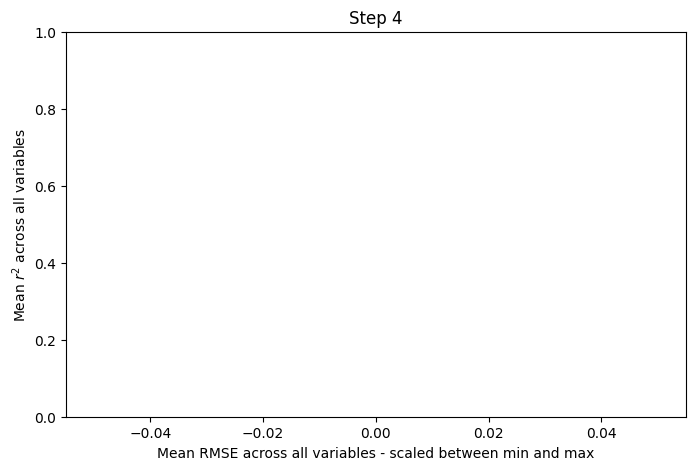

In [32]:
fig, ax = plt.subplots(figsize = (8,5))

sns.scatterplot(data = results, x='mean_rmse', y='mean_r2')
sns.scatterplot(data = results.iloc[top], x='mean_rmse', y='mean_r2', color='red')
sns.scatterplot(data = results.iloc[first], x='mean_rmse', y='mean_r2', color='yellow')

ax.title.set_text('Step {}'.format(STEP))
ax.set_ylabel('Mean $r^2$ across all variables')
ax.set_xlabel('Mean RMSE across all variables - scaled between min and max')
plt.ylim(0,1)
#plt.xlim(0,1)

In [51]:
results.columns

Index(['NPPAll1', 'NPPAll2', 'NPPAll3', 'NPPAll4', 'NPPAll5', 'VegCarbonLeaf1',
       'VegCarbonStem1', 'VegCarbonRoot1', 'VegCarbonLeaf2', 'VegCarbonStem2',
       'VegCarbonRoot2', 'VegCarbonLeaf3', 'VegCarbonStem3', 'VegCarbonRoot3',
       'VegCarbonLeaf4', 'VegCarbonLeaf5', 'VegNitrogenLeaf1',
       'VegNitrogenStem1', 'VegNitrogenRoot1', 'VegNitrogenLeaf2',
       'VegNitrogenStem2', 'VegNitrogenRoot2', 'VegNitrogenLeaf3',
       'VegNitrogenStem3', 'VegNitrogenRoot3', 'VegNitrogenLeaf4',
       'VegNitrogenLeaf5', 'nmax', 'krb(0)', 'krb(1)', 'krb(2)', 'cfall(0)',
       'cfall(1)', 'cfall(2)', 'nfall(0)', 'nfall(1)', 'nfall(2)', 'r2',
       'rmse', 'rmse_scaled', 'overall_accuracy', 'mean_rmse', 'mean_r2'],
      dtype='object')

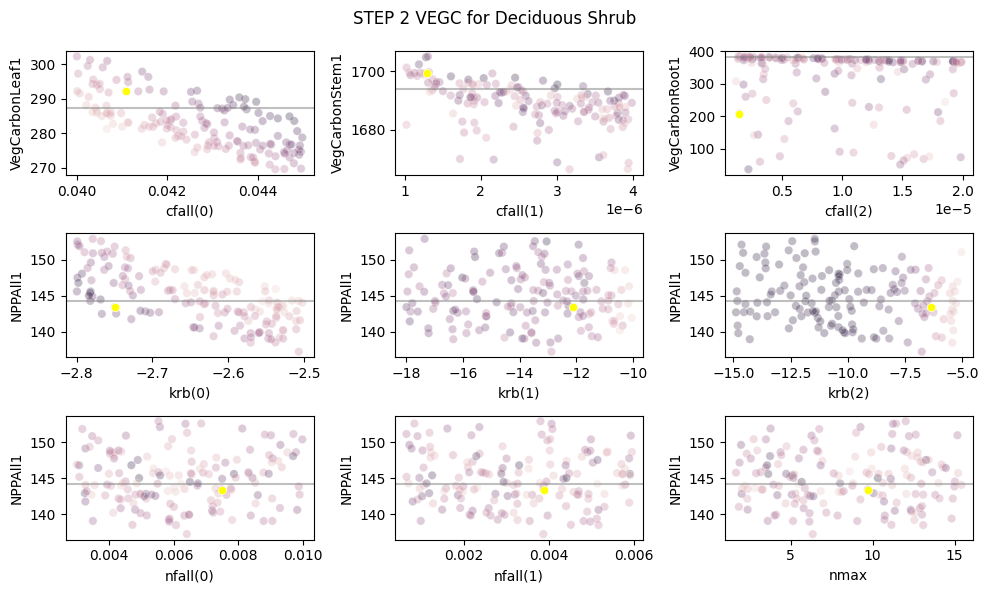

In [52]:
if STEP == 'NPP_VegC_PFT' or STEP=='NPP_VegC_VegN_PFT':
    pft=1
    fig, axes = plt.subplots(3,3, figsize = (10,6))
    fig.suptitle('STEP 2 VEGC for Deciduous Shrub')

    axes[0,0].axhline(targets[f'VegCarbonLeaf{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(0)', y=f'VegCarbonLeaf{pft}', ax=axes[0,0], alpha=0.3,legend=False, hue=f'NPPAll{pft}')
    #sns.scatterplot(data = results.iloc[top], x='cfall(0)', y=f'VegCarbonLeaf{pft}', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(0)', y=f'VegCarbonLeaf{pft}', ax=axes[0,0], color='yellow',legend=False)

    axes[0,1].axhline(targets[f'VegCarbonStem{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(1)', y=f'VegCarbonStem{pft}', ax=axes[0,1], alpha=0.3,legend=False, hue=f'NPPAll{pft}')
    #sns.scatterplot(data = results.iloc[top], x='cfall(1)', y=f'VegCarbonStem{pft}', ax=axes[0,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(1)', y=f'VegCarbonStem{pft}', ax=axes[0,1], color='yellow',legend=False)

    axes[0,2].axhline(targets[f'VegCarbonRoot{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(2)', y=f'VegCarbonRoot{pft}', ax=axes[0,2], alpha=0.3,legend=False, hue=f'NPPAll{pft}')
    #sns.scatterplot(data = results.iloc[top], x='cfall(2)', y=f'VegCarbonRoot{pft}', ax=axes[0,2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(2)', y=f'VegCarbonRoot{pft}', ax=axes[0,2], color='yellow',legend=False)
    
    axes[1,0].axhline(targets[f'NPPAll{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(0)', y=f'NPPAll{pft}', ax=axes[1,0], alpha=0.3,legend=False, hue=f'VegCarbonLeaf{pft}')
    #sns.scatterplot(data = results.iloc[top], x='krb(0)', y=f'NPPAll{pft}', ax=axes[1,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(0)', y=f'NPPAll{pft}', ax=axes[1,0], color='yellow',legend=False)
    
    axes[1,1].axhline(targets[f'NPPAll{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(1)', y=f'NPPAll{pft}', ax=axes[1,1], alpha=0.3,legend=False, hue=f'VegCarbonStem{pft}')
    #sns.scatterplot(data = results.iloc[top], x='krb(1)', y=f'NPPAll{pft}', ax=axes[1,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(1)', y=f'NPPAll{pft}', ax=axes[1,1], color='yellow',legend=False)
    
    axes[1,2].axhline(targets[f'NPPAll{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(2)', y=f'NPPAll{pft}', ax=axes[1,2], alpha=0.3,legend=False, hue=f'VegCarbonRoot{pft}')
    #sns.scatterplot(data = results.iloc[top], x='krb(2)', y=f'NPPAll{pft}', ax=axes[1,2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(2)', y=f'NPPAll{pft}', ax=axes[1,2], color='yellow',legend=False)
    
    axes[2,0].axhline(targets[f'NPPAll{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='nfall(0)', y=f'NPPAll{pft}', ax=axes[2,0], alpha=0.3,legend=False, hue=f'VegCarbonLeaf{pft}')
    #sns.scatterplot(data = results.iloc[top], x='krb(0)', y=f'NPPAll{pft}', ax=axes[1,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='nfall(0)', y=f'NPPAll{pft}', ax=axes[2,0], color='yellow',legend=False)
    
    axes[2,1].axhline(targets[f'NPPAll{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='nfall(1)', y=f'NPPAll{pft}', ax=axes[2,1], alpha=0.3,legend=False, hue=f'VegCarbonLeaf{pft}')
    #sns.scatterplot(data = results.iloc[top], x='krb(1)', y=f'NPPAll{pft}', ax=axes[1,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='nfall(1)', y=f'NPPAll{pft}', ax=axes[2,1], color='yellow',legend=False)
    
    axes[2,2].axhline(targets[f'NPPAll{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='nmax', y=f'NPPAll{pft}', ax=axes[2,2], alpha=0.3,legend=False, hue=f'VegCarbonLeaf{pft}')
    #sns.scatterplot(data = results.iloc[top], x='krb(2)', y=f'NPPAll{pft}', ax=axes[1,2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='nmax', y=f'NPPAll{pft}', ax=axes[2,2], color='yellow',legend=False)

    fig.tight_layout()

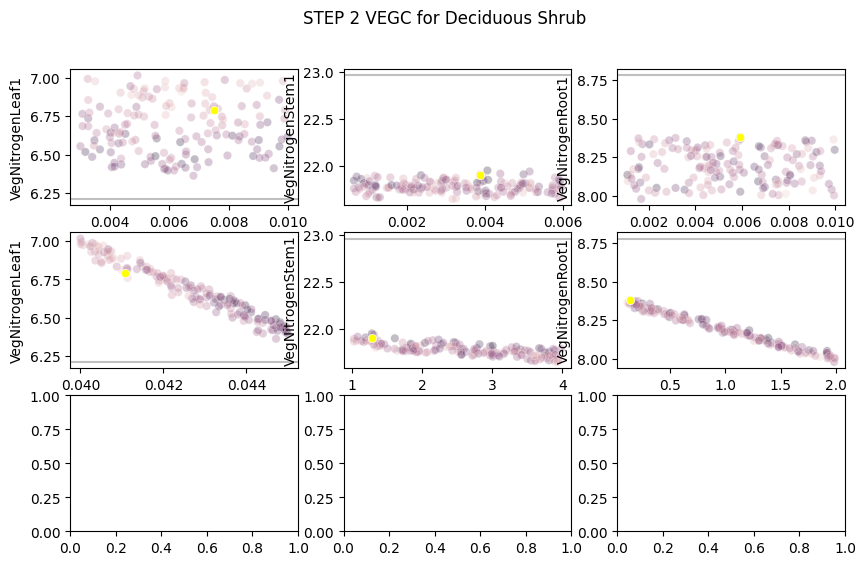

In [53]:
if 'NPP_VegC_VegN_PFT':
    pft=1
    fig, axes = plt.subplots(3,3, figsize = (10,6))
    fig.suptitle('STEP 2 VEGC for Deciduous Shrub')

    axes[0,0].axhline(targets[f'VegNitrogenLeaf{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='nfall(0)', y=f'VegNitrogenLeaf{pft}', ax=axes[0,0], alpha=0.3,legend=False, hue=f'NPPAll{pft}')
    #sns.scatterplot(data = results.iloc[top], x='cfall(0)', y=f'VegNitrogenLeaf{pft}', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='nfall(0)', y=f'VegNitrogenLeaf{pft}', ax=axes[0,0], color='yellow',legend=False)

    axes[0,1].axhline(targets[f'VegNitrogenStem{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='nfall(1)', y=f'VegNitrogenStem{pft}', ax=axes[0,1], alpha=0.3,legend=False, hue=f'NPPAll{pft}')
    #sns.scatterplot(data = results.iloc[top], x='cfall(1)', y=f'VegNitrogenStem{pft}', ax=axes[0,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='nfall(1)', y=f'VegNitrogenStem{pft}', ax=axes[0,1], color='yellow',legend=False)

    axes[0,2].axhline(targets[f'VegNitrogenRoot{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='nfall(2)', y=f'VegNitrogenRoot{pft}', ax=axes[0,2], alpha=0.3,legend=False, hue=f'NPPAll{pft}')
    #sns.scatterplot(data = results.iloc[top], x='cfall(2)', y=f'VegNitrogenRoot{pft}', ax=axes[0,2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='nfall(2)', y=f'VegNitrogenRoot{pft}', ax=axes[0,2], color='yellow',legend=False)
    
    axes[1,0].axhline(targets[f'VegNitrogenLeaf{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(0)', y=f'VegNitrogenLeaf{pft}', ax=axes[1,0], alpha=0.3,legend=False, hue=f'NPPAll{pft}')
    #sns.scatterplot(data = results.iloc[top], x='cfall(0)', y=f'VegNitrogenLeaf{pft}', ax=axes[0,0], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(0)', y=f'VegNitrogenLeaf{pft}', ax=axes[1,0], color='yellow',legend=False)

    axes[1,1].axhline(targets[f'VegNitrogenStem{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(1)', y=f'VegNitrogenStem{pft}', ax=axes[1,1], alpha=0.3,legend=False, hue=f'NPPAll{pft}')
    #sns.scatterplot(data = results.iloc[top], x='cfall(1)', y=f'VegNitrogenStem{pft}', ax=axes[0,1], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(1)', y=f'VegNitrogenStem{pft}', ax=axes[1,1], color='yellow',legend=False)

    axes[1,2].axhline(targets[f'VegNitrogenRoot{pft}'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cfall(2)', y=f'VegNitrogenRoot{pft}', ax=axes[1,2], alpha=0.3,legend=False, hue=f'NPPAll{pft}')
    #sns.scatterplot(data = results.iloc[top], x='cfall(2)', y=f'VegNitrogenRoot{pft}', ax=axes[0,2], color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='cfall(2)', y=f'VegNitrogenRoot{pft}', ax=axes[1,2], color='yellow',legend=False)
    

In [54]:
results.iloc[top][[f'VegCarbonLeaf{pft}', f'VegCarbonStem{pft}', f'VegCarbonRoot{pft}', f'NPPAll{pft}']].sort_values(by='NPPAll1')
#results.iloc[top][[f'VegCarbonLeaf{pft}', f'NPPAll{pft}']]

,VegCarbonLeaf1,VegCarbonStem1,VegCarbonRoot1,NPPAll1
38,282.676691,1693.807556,308.217813,138.504421
14,285.767276,1690.603638,361.954080,139.037697
112,277.278766,1682.121155,142.127020,139.178536
104,286.302963,1688.230469,364.801892,139.225388
149,285.692398,1686.982568,379.739410,139.808399
109,285.565213,1690.939331,372.678461,139.924023
56,290.489658,1686.089014,376.874484,140.617711
47,282.324966,1687.815552,372.885471,141.013907
118,281.796542,1699.633911,380.982120,141.440941
97,275.809711,1671.191406,328.705319,141.486553


In [55]:
targets[[f'VegCarbonLeaf{pft}', f'VegCarbonStem{pft}', f'VegCarbonRoot{pft}', f'NPPAll{pft}']]
#targets[[f'VegCarbonLeaf{pft}', f'NPPAll{pft}']]

VegCarbonLeaf1     287.19
VegCarbonStem1    1694.10
VegCarbonRoot1     383.38
NPPAll1            144.24
Name: 150, dtype: float64

In [61]:
results.iloc[149][calib_params_flat]

nmax         4.009579
krb(0)      -2.559999
krb(1)     -13.578343
krb(2)     -11.034463
cfall(0)     0.040659
cfall(1)     0.000004
cfall(2)     0.000004
nfall(0)     0.005169
nfall(1)     0.002166
nfall(2)     0.008843
Name: 149, dtype: float64

IndexError: single positional indexer is out-of-bounds

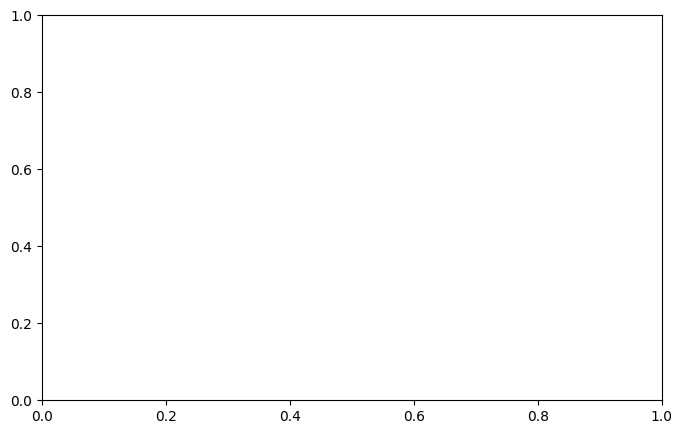

In [33]:
fig, ax=plt.subplots(figsize=(8,5))
#sns.lineplot(results[target_vars].T, legend=False, alpha=0.6)
sns.lineplot(results[target_vars].iloc[149].T, legend=False, alpha=0.6)
sns.scatterplot(targets.T, color='red')
plt.xticks(rotation=83)
plt.yscale('log')
plt.ylabel('Value')

fig.tight_layout()
plt.savefig('BONA_Black_Spruce_SA_ex.jpg', dpi=300)

In [34]:
#
#print(results[['VegVarbonStem1']] + results[['VegVarbonStem3']])

In [38]:
results

,NPPAll1,NPPAll2,NPPAll3,NPPAll4,NPPAll5,VegCarbonLeaf1,VegCarbonStem1,VegCarbonRoot1,VegCarbonLeaf2,VegCarbonStem2,...,cfall(2),nfall(0),nfall(1),nfall(2),r2,rmse,rmse_scaled,overall_accuracy,mean_rmse,mean_r2
0,146.192292,45.608496,22.543068,337.552729,44.828002,276.331604,1674.241394,315.266434,163.126819,229.588019,...,0.000014,0.008944,0.001948,0.005405,0.989164,0.400916,0.714991,0.274173,0.557953,0.989164
1,143.415671,45.560005,22.531598,337.557024,44.828936,273.546707,1660.395544,380.998099,163.126068,229.424770,...,0.000004,0.006976,0.005544,0.001306,0.994320,0.290270,0.221325,0.772995,0.255797,0.994320
2,148.065314,45.616139,22.548835,337.556483,44.828561,276.439450,1673.474255,59.257875,163.126926,229.626904,...,0.000017,0.008912,0.002323,0.008460,0.987310,0.433856,0.861960,0.125350,0.647908,0.987310
3,140.718747,45.580522,22.522077,337.516686,44.820423,289.621039,1687.670959,379.125580,163.127216,229.446640,...,0.000007,0.008073,0.000953,0.003838,0.993385,0.313233,0.323780,0.669606,0.318506,0.993385
4,146.479405,45.729185,22.560232,337.014917,44.761465,273.743689,1683.195935,358.957550,163.125641,230.268068,...,0.000005,0.003171,0.005299,0.001191,0.993814,0.302909,0.277716,0.716099,0.290312,0.993814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,150.439205,45.562603,22.530269,337.564590,44.829010,278.710077,1677.749146,314.842368,163.125809,229.358214,...,0.000013,0.005949,0.004035,0.008071,0.990235,0.380583,0.624273,0.365962,0.502428,0.990235
96,145.828854,45.555011,22.523687,337.549528,44.825996,282.907693,1680.989868,379.134164,163.125519,229.318947,...,0.000005,0.005536,0.002406,0.001236,0.994280,0.291294,0.225896,0.768383,0.258595,0.994280
97,141.011897,45.536298,22.517956,337.538769,44.824638,282.321036,1679.946924,372.885370,163.125873,229.228314,...,0.000006,0.006008,0.005313,0.008577,0.993866,0.301649,0.272094,0.721772,0.286871,0.993866
98,139.901631,45.564338,22.520957,337.529474,44.822647,285.839365,1699.271118,367.144128,163.126221,229.402258,...,0.000015,0.006475,0.002959,0.007566,0.989196,0.400322,0.712341,0.276855,0.556331,0.989196


Text(0, 0.5, 'Value')

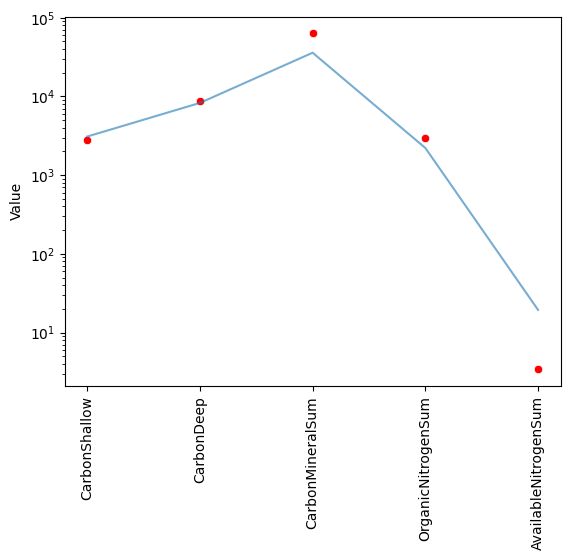

In [35]:
#sns.lineplot(results[target_vars].T, legend=False, alpha=0.6)
sns.lineplot(results[target_vars].iloc[first].T, legend=False, alpha=0.6, color='red')
sns.scatterplot(targets.T, color='red')
plt.xticks(rotation=90)
plt.yscale('log')
plt.ylabel('Value')

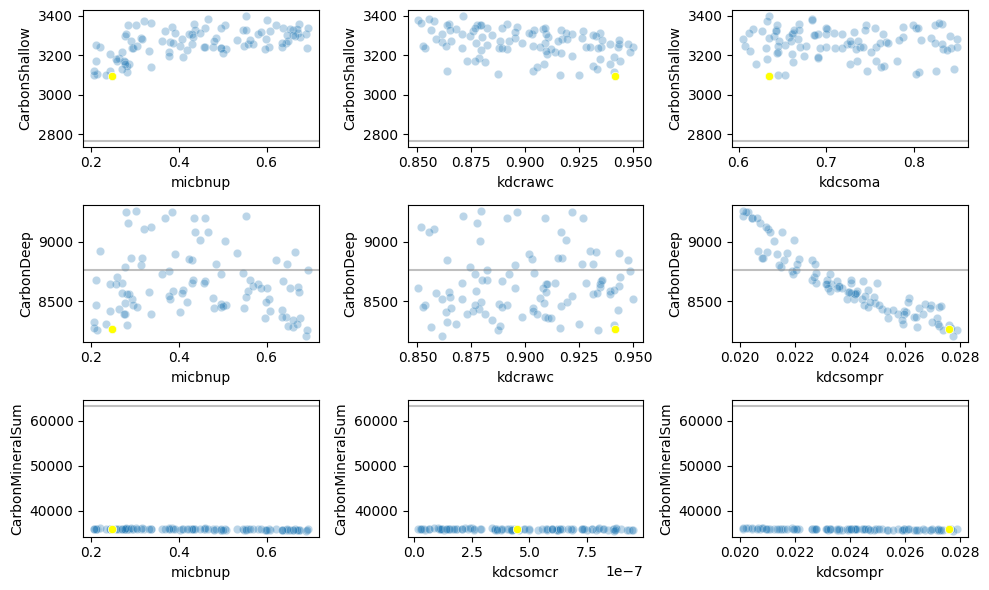

In [36]:
fig, axes = plt.subplots(3,3, figsize = (10,6))

axes[0,0].axhline(targets['CarbonShallow'], color='grey', alpha=0.5)
sns.scatterplot(data = results, x='micbnup', y='CarbonShallow', ax=axes[0,0], alpha=0.3,legend=False)
sns.scatterplot(data = results.iloc[first], x='micbnup', y='CarbonShallow', ax=axes[0,0], color='yellow',legend=False)

axes[0,1].axhline(targets['CarbonShallow'], color='grey', alpha=0.5)
sns.scatterplot(data = results, x='kdcrawc', y='CarbonShallow', ax=axes[0,1], alpha=0.3,legend=False)
sns.scatterplot(data = results.iloc[first], x='kdcrawc', y='CarbonShallow', ax=axes[0,1], color='yellow',legend=False)

axes[0,2].axhline(targets['CarbonShallow'], color='grey', alpha=0.5)
sns.scatterplot(data = results, x='kdcsoma', y='CarbonShallow', ax=axes[0,2], alpha=0.3,legend=False)
sns.scatterplot(data = results.iloc[first], x='kdcsoma', y='CarbonShallow', ax=axes[0,2], color='yellow',legend=False)


axes[1,0].axhline(targets['CarbonDeep'], color='grey', alpha=0.5)
sns.scatterplot(data = results, x='micbnup', y='CarbonDeep', ax=axes[1,0], alpha=0.3,legend=False)
sns.scatterplot(data = results.iloc[first], x='micbnup', y='CarbonDeep', ax=axes[1,0], color='yellow',legend=False)

axes[1,1].axhline(targets['CarbonDeep'], color='grey', alpha=0.5)
sns.scatterplot(data = results, x='kdcrawc', y='CarbonDeep', ax=axes[1,1], alpha=0.3,legend=False)
sns.scatterplot(data = results.iloc[first], x='kdcrawc', y='CarbonDeep', ax=axes[1,1], color='yellow',legend=False)

axes[1,2].axhline(targets['CarbonDeep'], color='grey', alpha=0.5)
sns.scatterplot(data = results, x='kdcsompr', y='CarbonDeep', ax=axes[1,2], alpha=0.3,legend=False)
sns.scatterplot(data = results.iloc[first], x='kdcsompr', y='CarbonDeep', ax=axes[1,2], color='yellow',legend=False)

axes[2,0].axhline(targets['CarbonMineralSum'], color='grey', alpha=0.5)
sns.scatterplot(data = results, x='micbnup', y='CarbonMineralSum', ax=axes[2,0], alpha=0.3,legend=False)
sns.scatterplot(data = results.iloc[first], x='micbnup', y='CarbonMineralSum', ax=axes[2,0], color='yellow',legend=False)

axes[2,1].axhline(targets['CarbonMineralSum'], color='grey', alpha=0.5)
sns.scatterplot(data = results, x='kdcsomcr', y='CarbonMineralSum', ax=axes[2,1], alpha=0.3,legend=False)
sns.scatterplot(data = results.iloc[first], x='kdcsomcr', y='CarbonMineralSum', ax=axes[2,1], color='yellow',legend=False)

axes[2,2].axhline(targets['CarbonMineralSum'], color='grey', alpha=0.5)
sns.scatterplot(data = results, x='kdcsompr', y='CarbonMineralSum', ax=axes[2,2], alpha=0.3,legend=False)
sns.scatterplot(data = results.iloc[first], x='kdcsompr', y='CarbonMineralSum', ax=axes[2,2], color='yellow',legend=False)

fig.tight_layout()

In [37]:
targets

CarbonShallow            2768.09
CarbonDeep               8765.64
CarbonMineralSum        63294.00
OrganicNitrogenSum       2981.04
AvailableNitrogenSum        3.41
Name: 100, dtype: float64

In [21]:
results.loc[(results['CarbonDeep']<9000) & (results['CarbonDeep']>8500)].sort_values(by='CarbonShallow')

,CarbonShallow,CarbonDeep,CarbonMineralSum,OrganicNitrogenSum,AvailableNitrogenSum,micbnup,kdcrawc,kdcsoma,kdcsompr,kdcsomcr,r2,rmse,rmse_scaled,overall_accuracy,mean_rmse,mean_r2
32,3185.399290,8642.430825,35971.913376,2262.638553,3.245538,0.378048,0.948652,0.751444,0.023558,1.026807e-07,NaN,0.164462,0.000000,NaN,0.082231,NaN
16,3194.835330,8643.274959,35893.536363,2269.366730,2.228052,0.429568,0.948003,0.723155,0.024931,6.337675e-07,NaN,1.181948,0.027680,NaN,0.604814,NaN
22,3228.334792,8852.405980,36053.152183,2204.117722,30.880456,0.219656,0.929941,0.756975,0.021226,8.737050e-07,NaN,27.470456,0.742839,NaN,14.106647,NaN
53,3229.918104,8600.722993,35847.980124,2262.433184,0.243376,0.484945,0.926246,0.819191,0.025131,8.214360e-07,NaN,3.166624,0.081672,NaN,1.624148,NaN
38,3239.797914,8581.053401,35911.030487,2259.885304,3.833165,0.361840,0.892544,0.726903,0.023636,1.157220e-07,NaN,0.423165,0.007038,NaN,0.215101,NaN
77,3249.731575,8797.391000,36039.502666,2245.995121,9.138990,0.289272,0.915275,0.659546,0.021492,2.439290e-07,NaN,5.728990,0.151379,NaN,2.940185,NaN
66,3254.007411,8650.505385,35962.206474,2247.406061,7.625700,0.312302,0.895244,0.635214,0.022646,4.988694e-07,NaN,4.215700,0.110211,NaN,2.162955,NaN
33,3260.282494,8631.639796,35940.078923,2233.197171,14.242674,0.276430,0.874596,0.640170,0.022799,2.858101e-07,NaN,10.832674,0.290221,NaN,5.561447,NaN
94,3262.754098,8721.831777,35924.803470,2273.905066,0.222542,0.531836,0.943683,0.783143,0.023224,3.215195e-08,NaN,3.187458,0.082238,NaN,1.634848,NaN
76,3268.041954,8788.116523,36004.108699,2250.842721,5.952594,0.315537,0.917189,0.604928,0.021562,8.001162e-07,NaN,2.542594,0.064695,NaN,1.303644,NaN


In [152]:
results.iloc[first]

,CarbonShallow,CarbonDeep,CarbonMineralSum,OrganicNitrogenSum,AvailableNitrogenSum,micbnup,kdcrawc,kdcsoma,kdcsompr,kdcsomcr,r2,rmse,rmse_scaled,overall_accuracy,mean_rmse,mean_r2
99,3276.115033,8862.008728,35225.800502,2266.147568,0.22539,0.245791,0.941731,0.634205,0.034254,4.465598e-07,NaN,3.18461,0.739997,NaN,1.962303,NaN


In [ ]:
if STEP == 'NPP_VegC_PFT':
    fig, ax=plt.subplots()
    ax.axhline(targets['NPPAll3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='krb(2)', y='NPPAll3', ax=ax, alpha=0.3,legend=False)
    sns.scatterplot(data = results.iloc[top], x='krb(2)', y='NPPAll3', ax=ax, color='red',legend=False)
    sns.scatterplot(data = results.iloc[first], x='krb(2)', y='NPPAll3', ax=ax, color='yellow',legend=False)
    ax.title.set_text('EvrTree')

/tmp/ipykernel_1595/787641772.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data = results, x='cmax.3', y='GPP4', ax=axes[1,0], alpha=0.05, palette=palette)


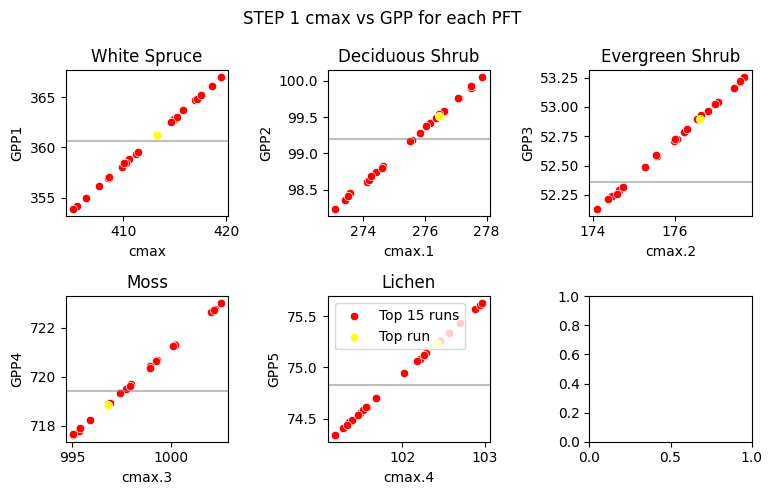

In [58]:
palette = sns.color_palette("mako", as_cmap=True)

if STEP == 1:
    fig, axes = plt.subplots(2,3, figsize = (8,5))
    fig.suptitle('STEP 1 cmax vs GPP for each PFT')

    axes[0,0].axhline(targets['GPP1'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cmax', y='GPP1', ax=axes[0,0], legend=False, alpha=0.05)
    sns.scatterplot(data = results.iloc[top], x='cmax', y='GPP1', ax=axes[0,0], color='red', legend=False)
    sns.scatterplot(data = results.iloc[first], x='cmax', y='GPP1', ax=axes[0,0], color='yellow', legend=False)
    axes[0,0].title.set_text(pfts[0])

    axes[0,1].axhline(targets['GPP2'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cmax.1', y='GPP2', ax=axes[0,1], legend=False, alpha=0.05)
    sns.scatterplot(data = results.iloc[top], x='cmax.1', y='GPP2', ax=axes[0,1], color='red', legend=False)
    sns.scatterplot(data = results.iloc[first], x='cmax.1', y='GPP2', ax=axes[0,1], color='yellow', legend=False)
    axes[0,1].title.set_text(pfts[1])

    axes[0,2].axhline(targets['GPP3'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cmax.2', y='GPP3', ax=axes[0,2], legend=False, alpha=0.05)
    sns.scatterplot(data = results.iloc[top], x='cmax.2', y='GPP3', ax=axes[0,2], color='red', legend=False)
    sns.scatterplot(data = results.iloc[first], x='cmax.2', y='GPP3', ax=axes[0,2], color='yellow', legend=False)
    axes[0,2].title.set_text(pfts[2])

    axes[1,0].axhline(targets['GPP4'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cmax.3', y='GPP4', ax=axes[1,0], alpha=0.05, palette=palette)
    sns.scatterplot(data = results.iloc[top], x='cmax.3', y='GPP4', ax=axes[1,0], color='red', legend=False)
    sns.scatterplot(data = results.iloc[first], x='cmax.3', y='GPP4', ax=axes[1,0], color='yellow', legend=False)
    axes[1,0].title.set_text(pfts[3])

    axes[1,1].axhline(targets['GPP5'], color='grey', alpha=0.5)
    sns.scatterplot(data = results, x='cmax.4', y='GPP5', ax=axes[1,1], legend=False, alpha=0.05)
    sns.scatterplot(data = results.iloc[top], x='cmax.4', y='GPP5', ax=axes[1,1], color='red', label='Top 15 runs')
    sns.scatterplot(data = results.iloc[first], x='cmax.4', y='GPP5', ax=axes[1,1], color='yellow', label='Top run')
    axes[1,1].title.set_text(pfts[4])

    #axes[1,1].legend(loc='lower right', bbox_to_anchor=(1,0), title='Overall Accuracy')
   
    fig.tight_layout()


In [59]:
results.iloc[first]

,GPP1,GPP2,GPP3,GPP4,GPP5,cmax,cmax.1,cmax.2,cmax.3,cmax.4,r2,rmse,rmse_scaled,overall_accuracy,mean_rmse,mean_r2
18,361.231913,99.511653,52.900271,718.843388,75.237088,413.231007,276.459476,176.607845,996.794154,102.424358,0.999996,0.502507,0.0,0.999996,0.251253,0.999996
